In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

In [9]:
df = pd.read_csv('drone_dataset_2.csv')
df

,lat,lng,altitude,tower_distance,signal_strength
0,23.748920,90.370270,40,1,-38.713106
1,23.748923,90.370328,40,1,-44.500284
2,23.748910,90.370265,40,1,-54.037567
3,23.748922,90.370279,40,1,-39.547895
4,23.748907,90.370332,40,1,-63.601030
...,...,...,...,...,...
14995,23.749066,90.368026,20,50,-85.181694
14996,23.748513,90.369207,20,50,-117.690193
14997,23.749077,90.372567,20,50,-55.617414
14998,23.749363,90.370077,20,50,-84.463796


In [13]:
# separate dataframes by altitude
df40 = df[df['altitude'] == 40]
df30 = df[df['altitude'] == 30]
df20 = df[df['altitude'] == 20]

#

## Visualizing signal strength at different altitudes

Text(0.5, 1.0, 'Signal strength at 20m altitude')

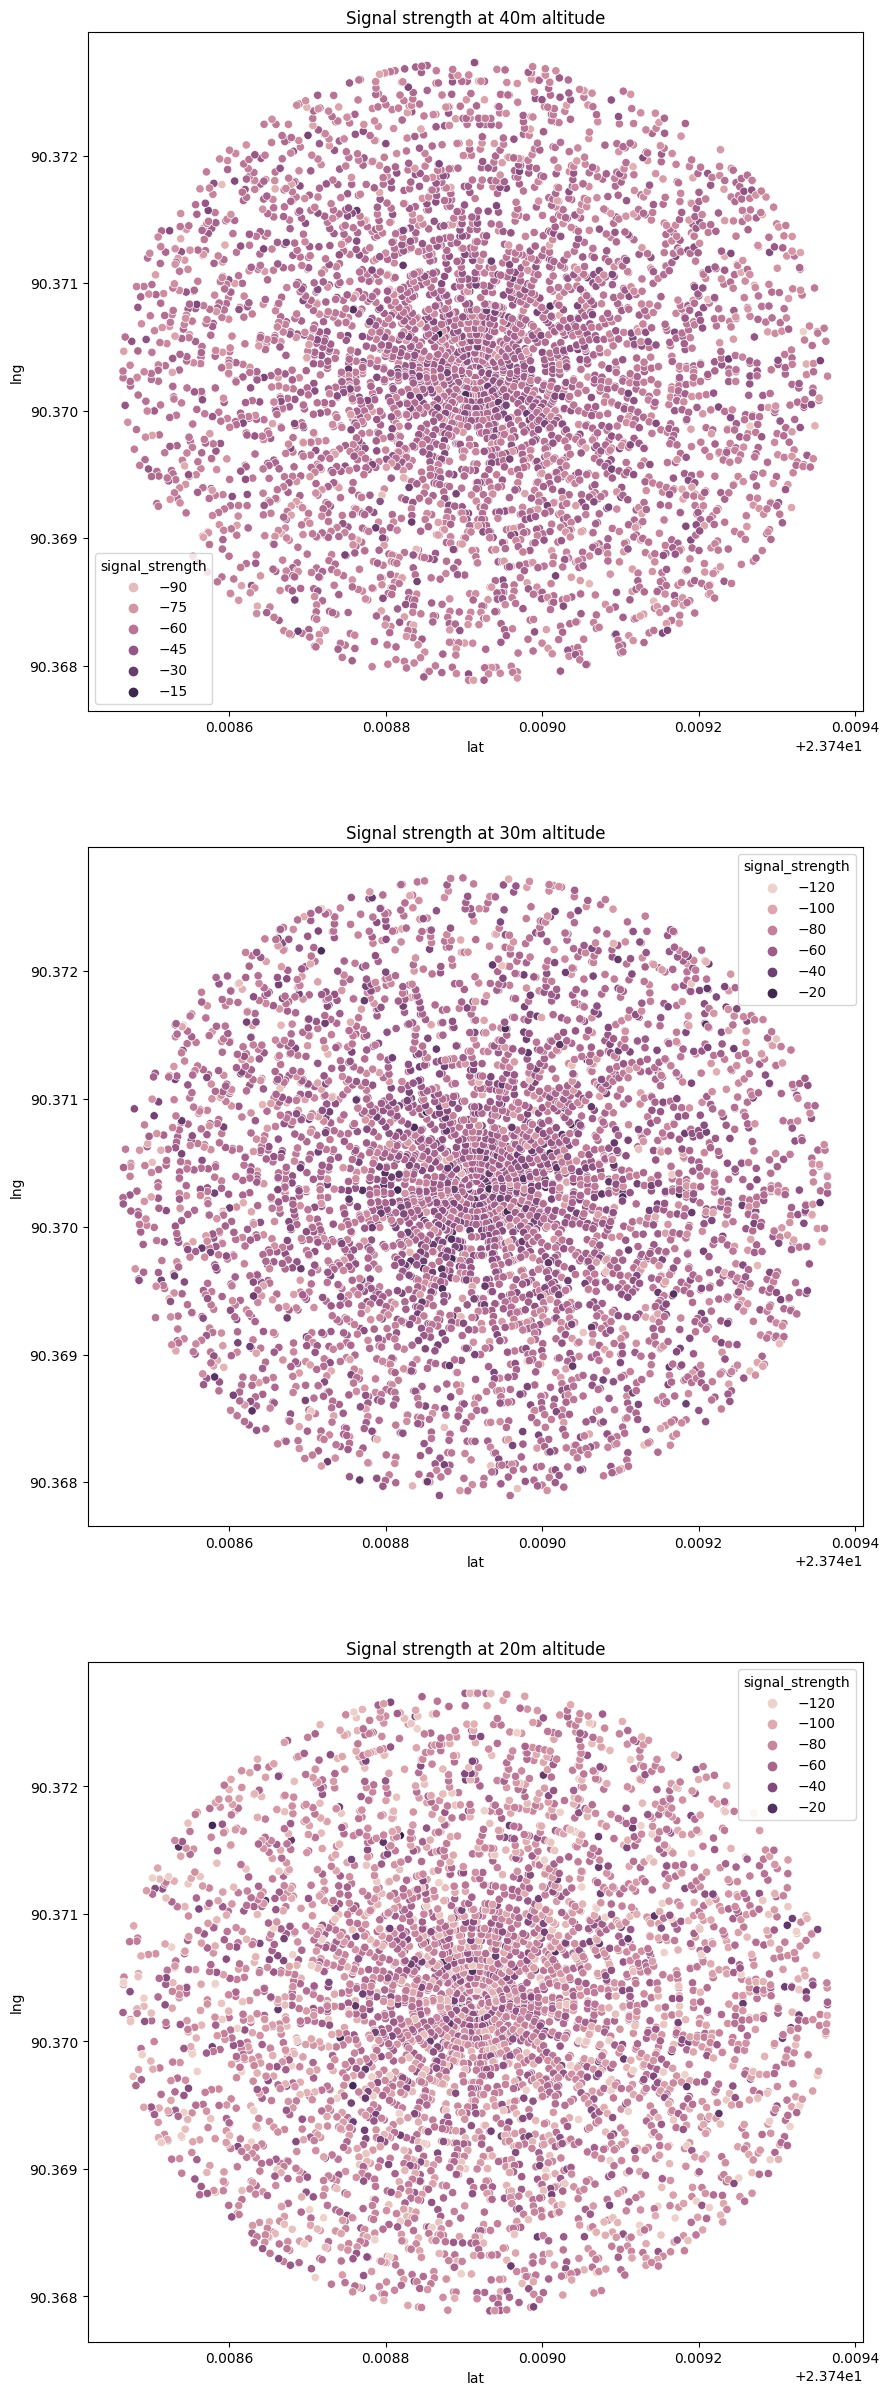

In [14]:
# Scatterplot

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

# Plot for 40m altitude, 30m altitude, and 20m altitude
sns.scatterplot(x=df40['lat'], y=df40['lng'], hue=df40['signal_strength'], ax=ax1)
ax1.set_title('Signal strength at 40m altitude')

sns.scatterplot(x=df30['lat'], y=df30['lng'], hue=df30['signal_strength'], ax=ax2)
ax2.set_title('Signal strength at 30m altitude')

sns.scatterplot(x=df20['lat'], y=df20['lng'], hue=df20['signal_strength'], ax=ax3)
ax3.set_title('Signal strength at 20m altitude')

ValueError: min() arg is an empty sequence

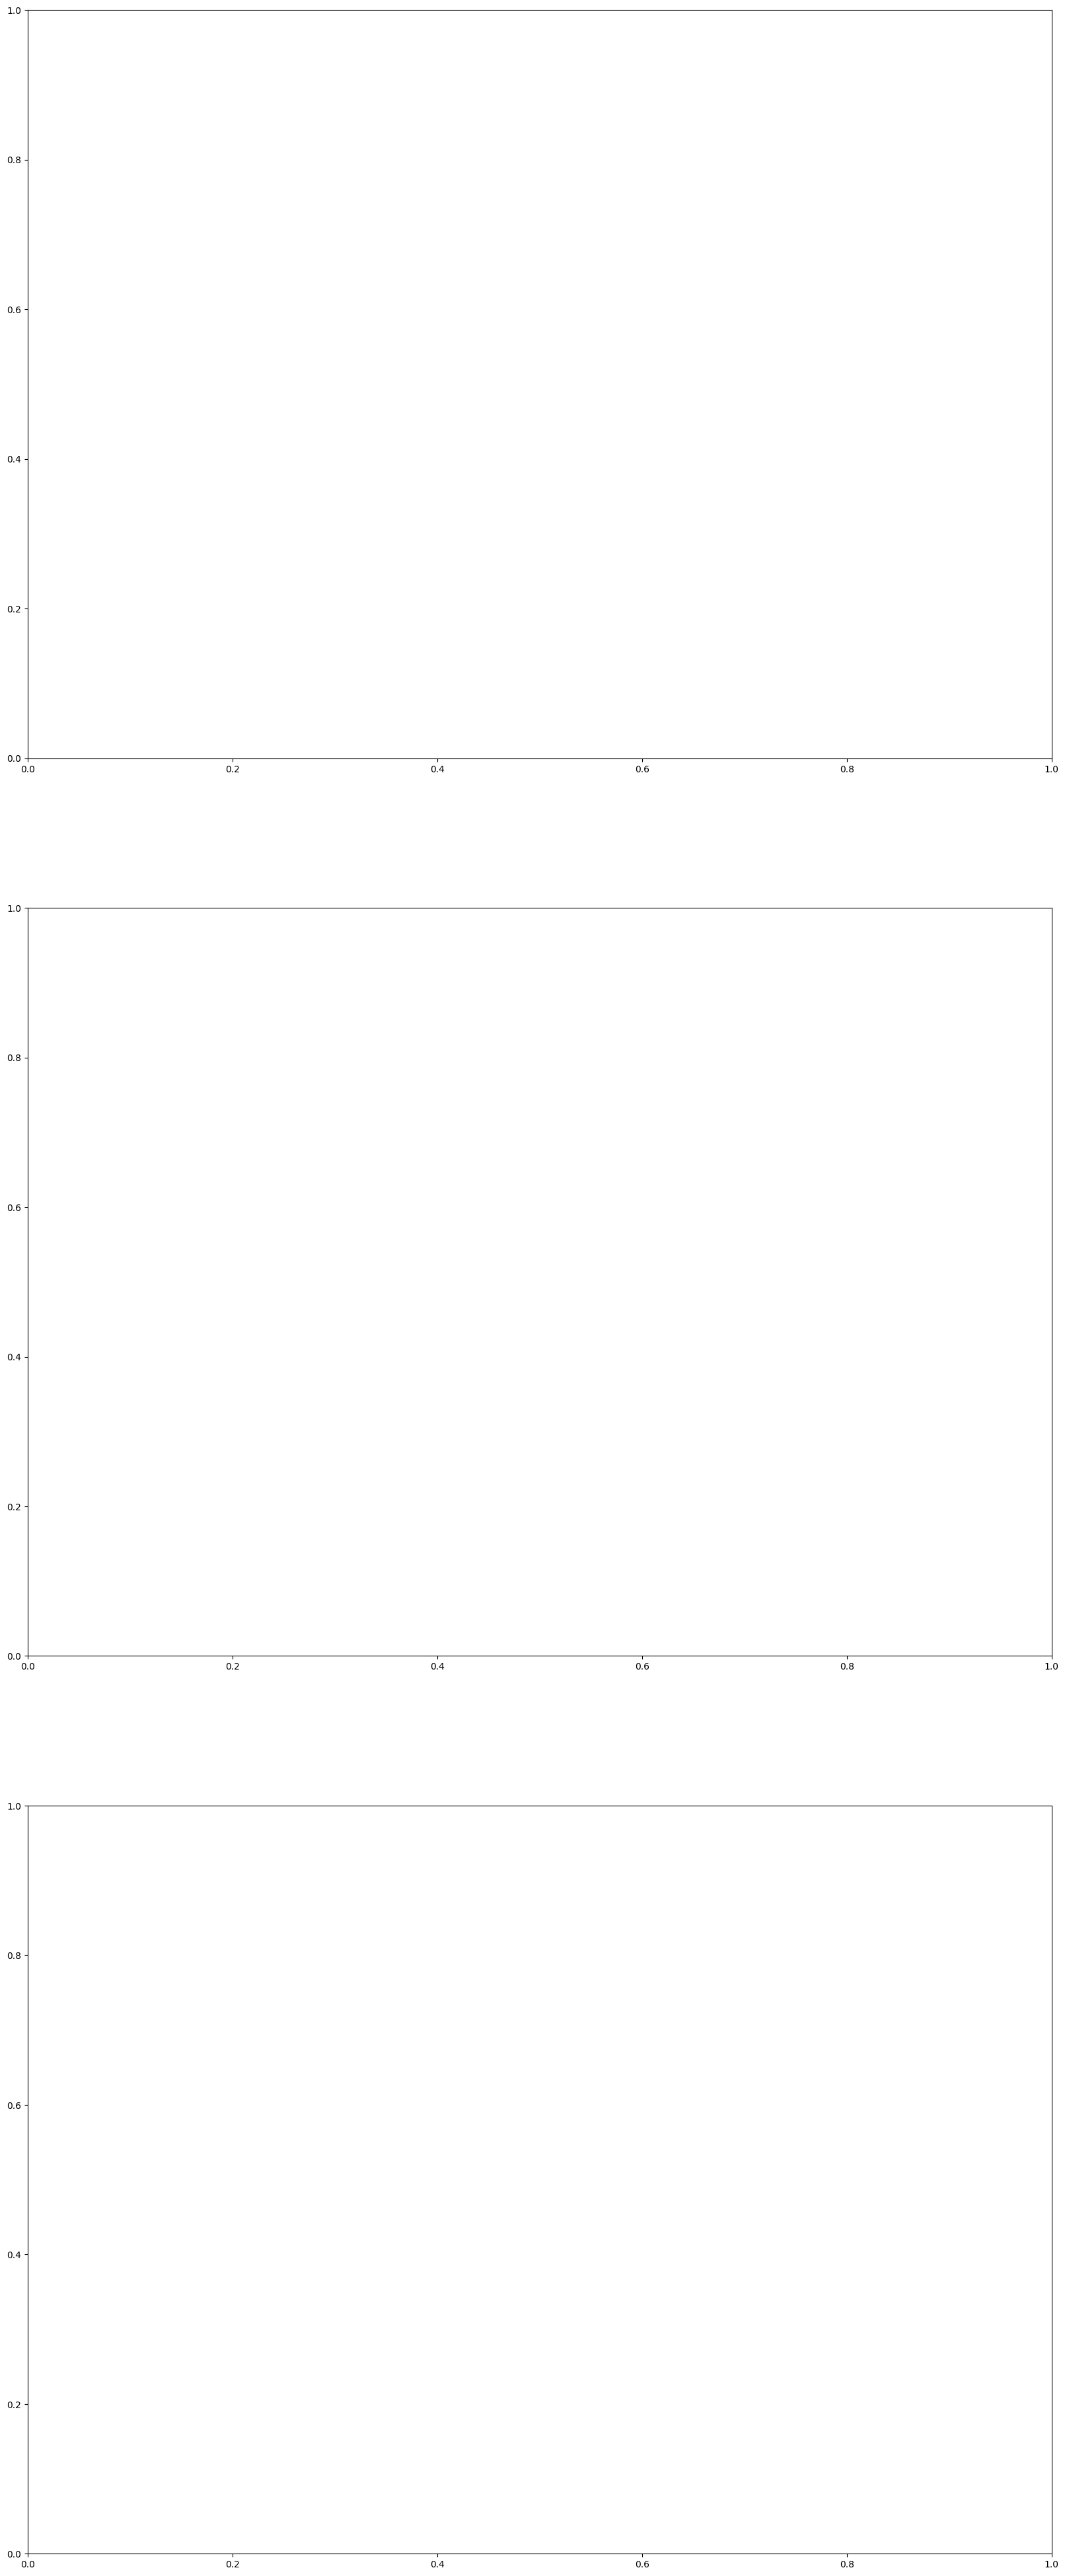

In [12]:
# Barplot

fig2, [axx1, axx2, axx3] = plt.subplots(nrows=3, ncols=1, figsize=(20, 50))

# sns.barplot(x=df60['tower_distance'], y=df60['signal_strength'], ax=axx1)
# axx1.set_title('Tower Distance Vs Signal strength at 60m altitude')

# sns.barplot(x=df50['tower_distance'], y=df50['signal_strength'], ax=axx2)
# axx2.set_title('Tower Distance Vs Signal strength at 50m altitude')

sns.barplot(x=df40['tower_distance'], y=df40['signal_strength'], ax=axx1)
axx1.set_title('Tower Distance Vs Signal strength at 40m altitude')

sns.barplot(x=df30['tower_distance'], y=df30['signal_strength'], ax=axx2)
axx2.set_title('Tower Distance Vs Signal strength at 30m altitude')

sns.barplot(x=df20['tower_distance'], y=df20['signal_strength'], ax=axx3)
axx3.set_title('Tower Distance Vs Signal strength at 20m altitude')

Text(0.5, 1.0, 'Signal strength at 10m tower distance')

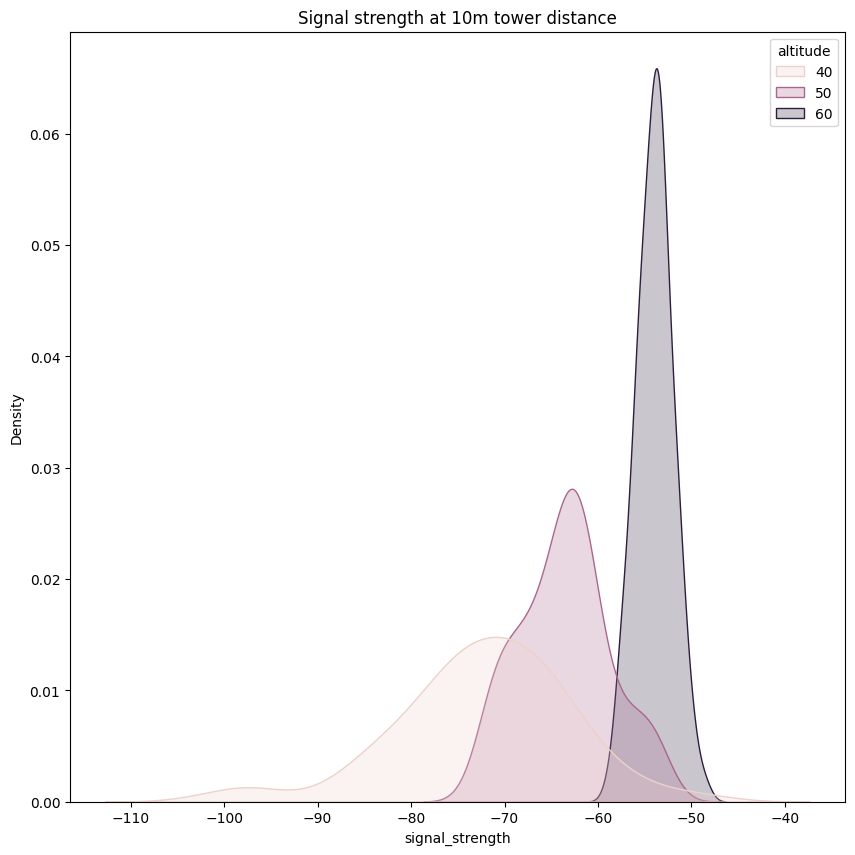

In [ ]:
df_10 = df[df['tower_distance'] == 10]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_10, x='signal_strength', hue='altitude', fill=True)
plt.title('Signal strength at 10m tower distance')

Text(0.5, 1.0, 'Signal strength at 20m tower distance')

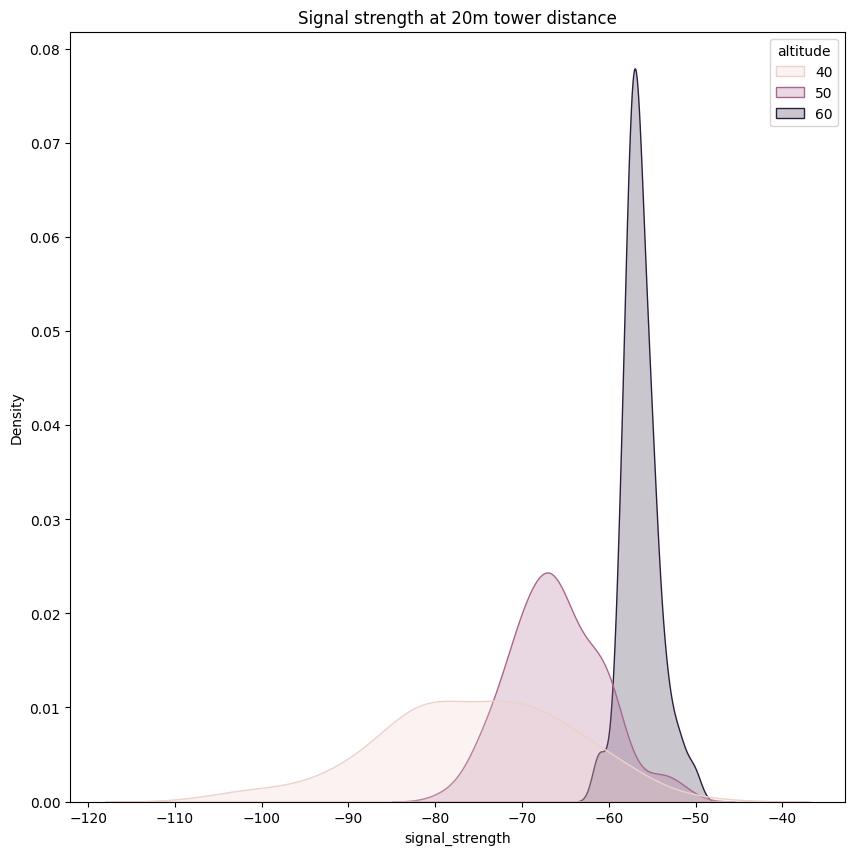

In [ ]:
df_20 = df[df['tower_distance'] == 20]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_20, x='signal_strength', hue='altitude', fill=True)
plt.title('Signal strength at 20m tower distance')

Text(0.5, 1.0, 'Signal strength at 30m tower distance')

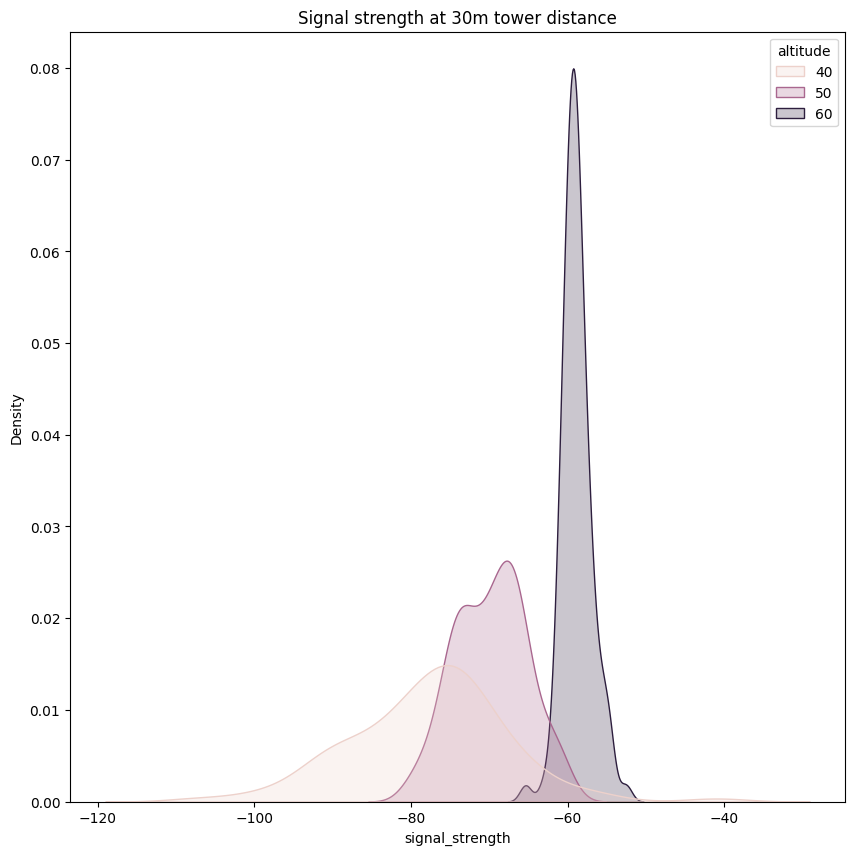

In [ ]:
df_30 = df[df['tower_distance'] == 30]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_30, x='signal_strength', hue='altitude', fill=True)
plt.title('Signal strength at 30m tower distance')

Text(0.5, 1.0, 'Signal strength at 60m tower distance')

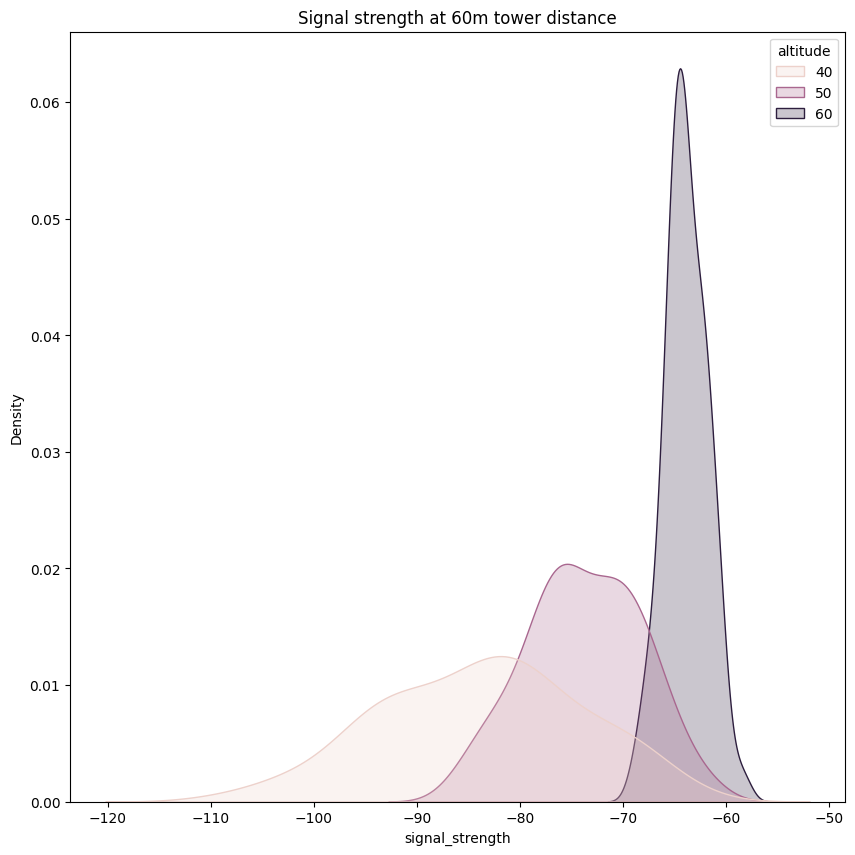

In [ ]:
df_60 = df[df['tower_distance'] == 60]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_60, x='signal_strength', hue='altitude', fill=True)
plt.title('Signal strength at 60m tower distance')

## Train a linear regression model

Epoch 1/50
300/300 - 1s - loss: 2436.2007 - mean_absolute_error: 41.4172 - val_loss: 152.7580 - val_mean_absolute_error: 9.8324 - 1s/epoch - 4ms/step
Epoch 2/50
300/300 - 0s - loss: 115.3005 - mean_absolute_error: 8.4941 - val_loss: 90.7636 - val_mean_absolute_error: 7.4733 - 436ms/epoch - 1ms/step
Epoch 3/50
300/300 - 0s - loss: 69.1391 - mean_absolute_error: 6.3681 - val_loss: 62.6157 - val_mean_absolute_error: 5.8670 - 428ms/epoch - 1ms/step
Epoch 4/50
300/300 - 0s - loss: 52.5112 - mean_absolute_error: 5.3004 - val_loss: 53.7200 - val_mean_absolute_error: 5.2429 - 429ms/epoch - 1ms/step
Epoch 5/50
300/300 - 0s - loss: 47.4636 - mean_absolute_error: 4.8922 - val_loss: 50.8168 - val_mean_absolute_error: 4.9867 - 430ms/epoch - 1ms/step
Epoch 6/50
300/300 - 0s - loss: 45.5861 - mean_absolute_error: 4.7138 - val_loss: 50.5470 - val_mean_absolute_error: 4.9140 - 454ms/epoch - 2ms/step
Epoch 7/50
300/300 - 0s - loss: 44.9319 - mean_absolute_error: 4.6537 - val_loss: 48.8334 - val_mean_abs

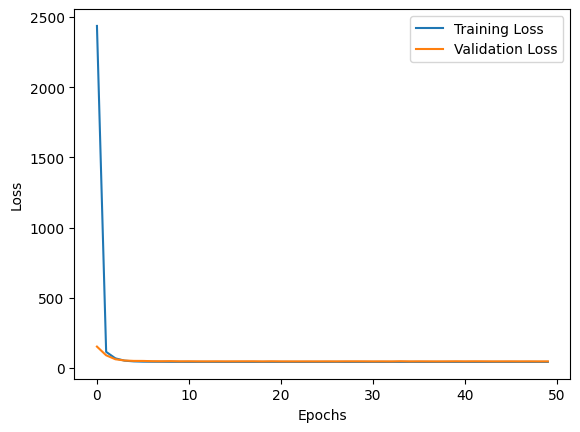

In [ ]:
# Split the data into input, output
X = df[['tower_distance', 'altitude']].values
y = df['signal_strength'].values

# Split the data intto training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

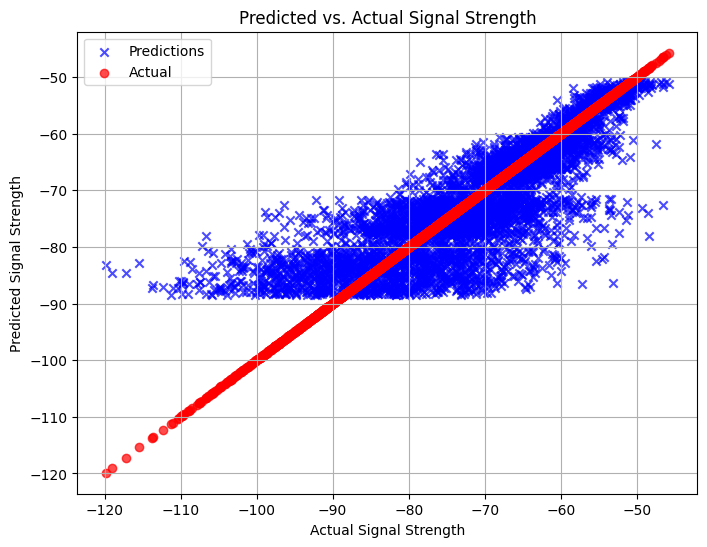

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='x', color='blue', label='Predictions', alpha=0.7)
plt.scatter(y_test, y_test, marker='o', color='red', label='Actual', alpha=0.7)
plt.xlabel('Actual Signal Strength')
plt.ylabel('Predicted Signal Strength')
plt.title('Predicted vs. Actual Signal Strength')
plt.legend()
plt.grid(True)
plt.show()